In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from pathlib import Path
from matplotlib.colors import ListedColormap, BoundaryNorm

In [84]:
# VSC setting: "notebook.output.textLineLimit": 170

pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 9)
pd.set_option('display.float_format', '{:.6f}'.format)

In [85]:
asset = 'BTC' 
freq = '5min'

DATA_DIR = Path('dataset')
path = DATA_DIR / f"{asset}_{freq}.csv"
if path.exists():
    print(f'Loading {asset} from {path}')
    df = pd.read_csv(path,index_col=0)
    df['timestamp'] = pd.to_datetime(df["system_time"])
    df['timestamp'] = df['timestamp'].dt.round('min')
    df = df.sort_values('timestamp').set_index('timestamp')
print(f"{asset}: {df.shape[0]} rows, {df.shape[1]} columns")
display(df.head(3))

Loading BTC from dataset/BTC_5min.csv
BTC: 3367 rows, 155 columns


,system_time,midpoint,spread,buys,sells,bids_distance_0,bids_distance_1,bids_distance_2,bids_distance_3,bids_distance_4,...,asks_market_notional_5,asks_market_notional_6,asks_market_notional_7,asks_market_notional_8,asks_market_notional_9,asks_market_notional_10,asks_market_notional_11,asks_market_notional_12,asks_market_notional_13,asks_market_notional_14
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-04-07 11:38:00+00:00,2021-04-07 11:37:41.122161+00:00,55899.995000,0.010000,11993042.137718,13486155.647609,-0.000000,-0.000129,-0.000130,-0.000143,-0.000201,...,312.040009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-04-07 11:43:00+00:00,2021-04-07 11:42:41.122161+00:00,56111.655000,0.010000,10295373.525590,5020347.279235,-0.000000,-0.000101,-0.000207,-0.000208,-0.000208,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-04-07 11:48:00+00:00,2021-04-07 11:47:41.122161+00:00,56100.015000,0.010000,3825363.056192,4640025.747520,-0.000000,-0.000000,-0.000384,-0.000410,-0.000427,...,633.090027,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Missing and Zero values

In [86]:
print(f"Missing values: {df.isna().sum().sum()} total ({(df.isna().sum().sum()/df.size)*100:.3f}%)")

Missing values: 0 total (0.000%)


There are no missing values

In [87]:
print(f"Zero values: {df.isin([0]).sum().sum()} total ({(df.isin([0]).sum().sum()/df.size)*100:.3f}%)")

Zero values: 171470 total (32.856%)


But there are a lot of Zero values

In [89]:
# check for all columns except those related to 'market', 'cancel', 'limit'
most_zeros = df.columns.str.contains('market|cancel|limit', case=False)

print(f"Zero values without market/cancel/limit columns: {df[df.columns[~most_zeros]].isin([0]).sum().sum()} total ({(df[df.columns[~most_zeros]].isin([0]).sum().sum()/df[df.columns[~most_zeros]].size)*100:.3f}%)")
df[df.columns[~most_zeros]].isin([0]).sum().nlargest(5)

Zero values without market/cancel/limit columns: 12 total (0.005%)


bids_notional_0     9
asks_notional_0     2
bids_notional_12    1
system_time         0
midpoint            0
dtype: int64

Most zero values are in additional descriptive columns {'market', 'cancel', 'limit'} 

In [90]:
market_columns = df.columns.str.contains('market', case=False)

print(f"Zero values in market columns: {df[df.columns[market_columns]].isin([0]).sum().sum()} total ({(df[df.columns[market_columns]].isin([0]).sum().sum()/df[df.columns[market_columns]].size)*100:.3f}%)")
df[df.columns[market_columns]].isin([0]).sum().sort_values(ascending=False)

Zero values in market columns: 91389 total (90.475%)


bids_market_notional_12    3264
bids_market_notional_14    3259
bids_market_notional_13    3256
bids_market_notional_11    3248
bids_market_notional_10    3244
bids_market_notional_9     3237
bids_market_notional_7     3232
asks_market_notional_12    3232
asks_market_notional_13    3227
bids_market_notional_6     3227
bids_market_notional_8     3223
asks_market_notional_14    3223
asks_market_notional_11    3208
asks_market_notional_9     3207
asks_market_notional_8     3203
asks_market_notional_7     3195
asks_market_notional_10    3192
bids_market_notional_5     3186
asks_market_notional_6     3178
bids_market_notional_4     3175
asks_market_notional_5     3138
asks_market_notional_4     3133
bids_market_notional_3     3124
bids_market_notional_2     3096
asks_market_notional_3     3053
asks_market_notional_2     3040
bids_market_notional_1     3033
asks_market_notional_1     2904
bids_market_notional_0     1524
asks_market_notional_0      928
dtype: int64

In [80]:
cancel_columns = df.columns.str.contains('cancel', case=False)

print(f"Zero values in cancel columns: {df[df.columns[cancel_columns]].isin([0]).sum().sum()} total ({(df[df.columns[cancel_columns]].isin([0]).sum().sum()/df[df.columns[cancel_columns]].size)*100:.3f}%)")
df[df.columns[cancel_columns]].isin([0]).sum().sort_values(ascending=False)

Zero values in cancel columns: 79541 total (78.746%)


bids_cancel_notional_13    2876
bids_cancel_notional_9     2872
bids_cancel_notional_14    2867
bids_cancel_notional_12    2867
bids_cancel_notional_10    2862
bids_cancel_notional_11    2838
asks_cancel_notional_11    2827
bids_cancel_notional_8     2826
asks_cancel_notional_13    2811
asks_cancel_notional_12    2811
bids_cancel_notional_7     2811
asks_cancel_notional_14    2810
asks_cancel_notional_9     2803
asks_cancel_notional_8     2802
bids_cancel_notional_6     2795
asks_cancel_notional_10    2793
asks_cancel_notional_7     2786
asks_cancel_notional_6     2762
asks_cancel_notional_5     2746
bids_cancel_notional_5     2734
asks_cancel_notional_4     2727
bids_cancel_notional_4     2720
asks_cancel_notional_3     2642
asks_cancel_notional_2     2638
bids_cancel_notional_3     2600
bids_cancel_notional_2     2569
asks_cancel_notional_1     2529
bids_cancel_notional_1     2517
asks_cancel_notional_0     1197
bids_cancel_notional_0     1103
dtype: int64

In [82]:
limit_columns = df.columns.str.contains('limit', case=False)

print(f"Zero values in limit columns: {df[df.columns[limit_columns]].isin([0]).sum().sum()} total ({(df[df.columns[limit_columns]].isin([0]).sum().sum()/df[df.columns[limit_columns]].size)*100:.3f}%)")
df[df.columns[limit_columns]].isin([0]).sum().sort_values(ascending=False)

Zero values in limit columns: 528 total (0.523%)


asks_limit_notional_6     28
asks_limit_notional_10    28
asks_limit_notional_14    27
asks_limit_notional_12    27
asks_limit_notional_5     25
asks_limit_notional_3     25
asks_limit_notional_11    23
asks_limit_notional_8     23
asks_limit_notional_7     23
asks_limit_notional_4     23
asks_limit_notional_13    22
bids_limit_notional_14    21
asks_limit_notional_9     21
bids_limit_notional_10    20
bids_limit_notional_7     17
bids_limit_notional_9     17
asks_limit_notional_2     17
bids_limit_notional_6     16
bids_limit_notional_13    16
bids_limit_notional_1     16
bids_limit_notional_4     13
bids_limit_notional_12    12
asks_limit_notional_1     12
bids_limit_notional_5     11
bids_limit_notional_11    11
bids_limit_notional_2     11
bids_limit_notional_8     11
bids_limit_notional_3      9
asks_limit_notional_0      2
bids_limit_notional_0      1
dtype: int64

Market and Cancel columns can include up to 90% of zero values (even for the 1st or 2nd level)

Limit_Notinal Asks and Bids include just a few zero values.

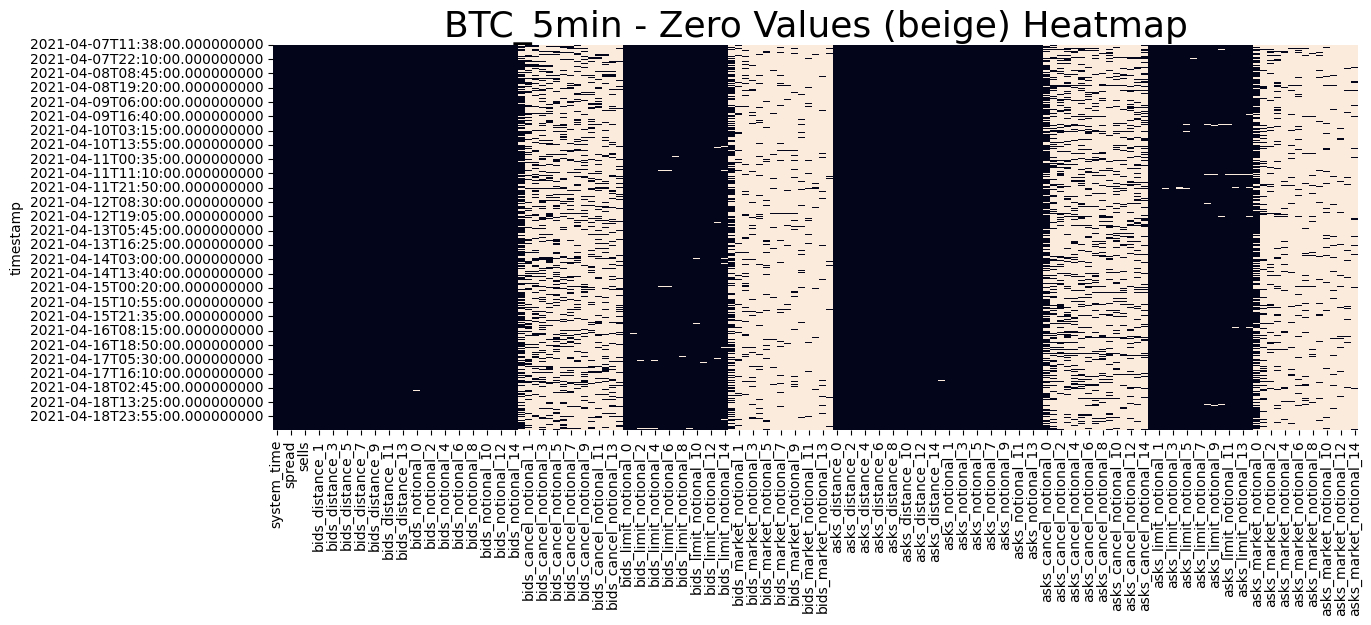

In [105]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.heatmap(df == 0, cbar=False, ax=ax)
plt.title(f'{asset}_{freq} - Zero Values (beige) Heatmap', fontsize=26)
plt.show()

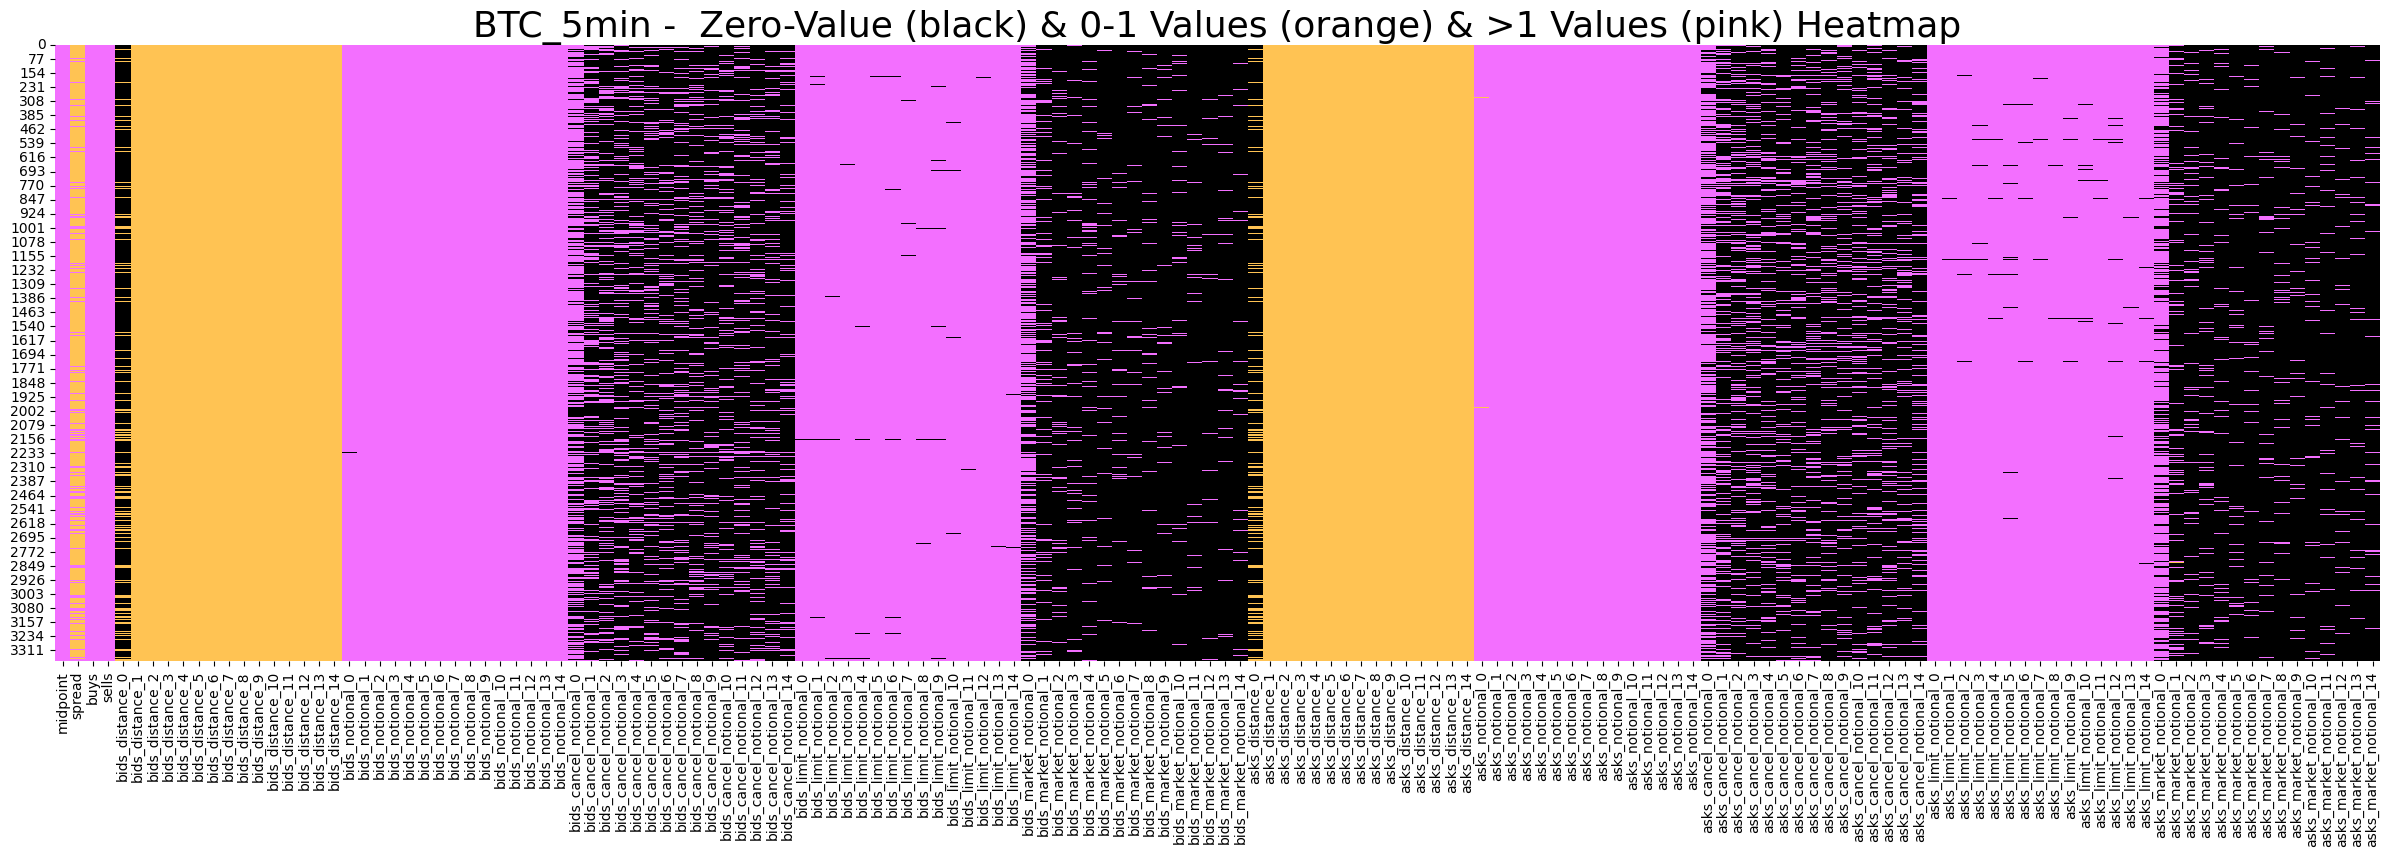

In [104]:

threshold_0 = 1e-7 
bins = np.array([threshold_0, 1.0])
data_abs = df.select_dtypes(include=[np.number]).abs().values
categories = np.digitize(data_abs, bins)

cmap_colors = ["#000000",  # 0
               "#ffc353",  #  (0, 1]
               "#f36fff"]  #  > 1
cmap = ListedColormap(cmap_colors)
norm = BoundaryNorm([0, 1, 2, 3], cmap.N) 


fig, ax = plt.subplots(figsize=(30, 8))
sns.heatmap(categories, 
            cmap=cmap, 
            norm=norm, 
            cbar=False,  
            ax=ax,
            xticklabels=df.select_dtypes(include=[np.number]).columns)

ax.set_title(f'{asset}_{freq} -  Zero-Value (black) & 0-1 Values (orange) & >1 Values (pink) Heatmap', fontsize=26)
plt.show()

Overall the data is well marked because there are no missing values and Zero values happens usually happens in the columns that are logically correct (Market and Cancel bids and asks). In the cryptocurancy the vast of trade orders are executed via "limit" operations, which is approved by the data. 

## General statistics

In [40]:
# VSC setting: "notebook.output.textLineLimit": 170

pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 9)
pd.set_option('display.float_format', '{:.6f}'.format)

display(df.describe().transpose())

pd.reset_option('display.float_format')

,count,mean,std,min,25%,50%,75%,max
midpoint,3367.000000,59971.972446,2489.092797,52947.105000,57990.050000,60148.860000,62188.030000,64760.235000
spread,3367.000000,1.246264,4.420446,0.010000,0.010000,0.010000,0.010000,160.360000
buys,3367.000000,1688951.284820,2013268.394567,56146.395957,645696.260698,1117926.280110,2038280.722811,37144431.991920
sells,3367.000000,1474375.843004,2261480.159941,49085.436510,497804.491357,910920.671899,1702582.880769,66575996.113984
bids_distance_0,3367.000000,-0.000011,0.000039,-0.001472,-0.000000,-0.000000,-0.000000,-0.000000
bids_distance_1,3367.000000,-0.000047,0.000065,-0.001483,-0.000069,-0.000027,-0.000003,-0.000000
bids_distance_2,3367.000000,-0.000078,0.000079,-0.001596,-0.000105,-0.000061,-0.000026,-0.000000
bids_distance_3,3367.000000,-0.000104,0.000088,-0.001597,-0.000139,-0.000085,-0.000044,-0.000001
bids_distance_4,3367.000000,-0.000128,0.000097,-0.001625,-0.000170,-0.000108,-0.000062,-0.000001
bids_distance_5,3367.000000,-0.000150,0.000106,-0.001625,-0.000198,-0.000131,-0.000080,-0.000001


The only negative are "bids_distance_X", because they are calculated as "behind" midpoint.

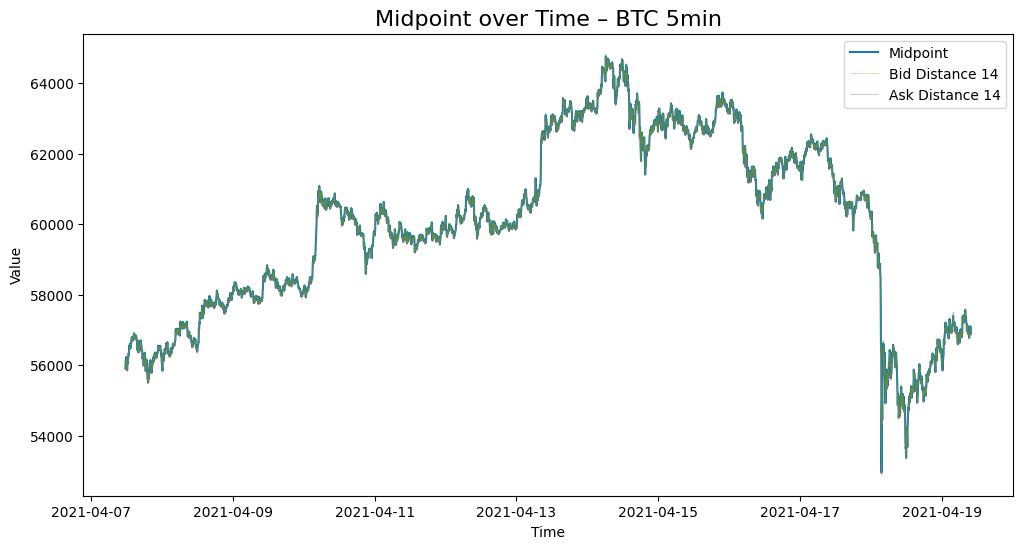

In [115]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['midpoint'], label='Midpoint', linewidth=1.5)
plt.plot(df.index, (1+df['bids_distance_14'])*df['midpoint'], label='Bid Distance 14', linewidth=0.5, alpha=0.5)
plt.plot(df.index, (1+df['asks_distance_14'])*df['midpoint'], label='Ask Distance 14', linewidth=0.5, alpha=0.5)
plt.legend()
plt.title(f'Midpoint over Time – {asset} {freq}', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

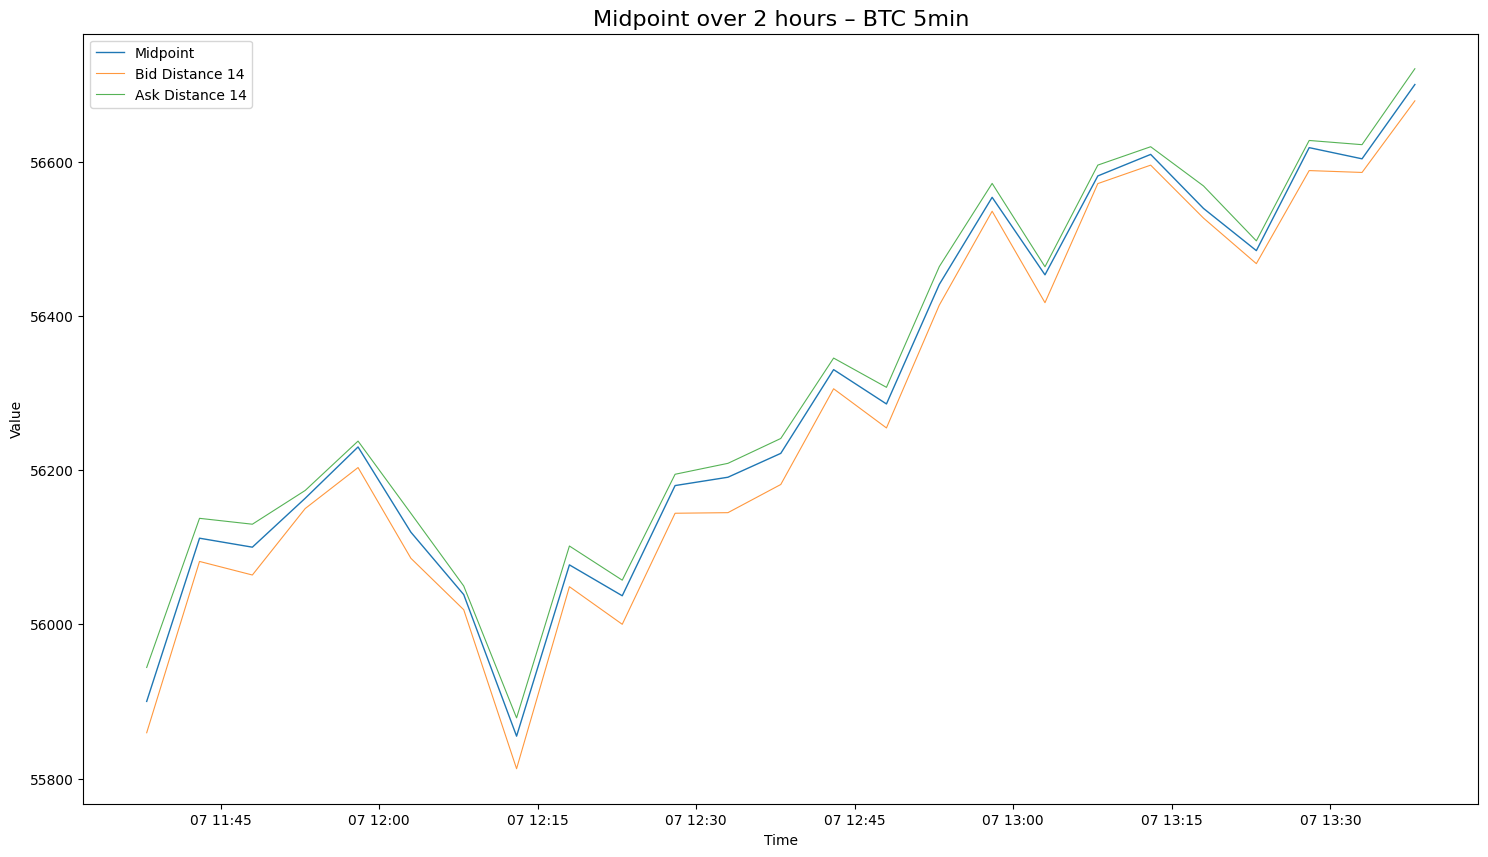

In [129]:
df_1day = df[df.index <= (df.index.min() + pd.Timedelta('2 hours'))]

plt.figure(figsize=(18, 10))
plt.plot(df_1day.index, df_1day['midpoint'], label='Midpoint', linewidth=1)
plt.plot(df_1day.index, (1+df_1day['bids_distance_14'])*df_1day['midpoint'], label='Bid Distance 14', linewidth=0.8, alpha=0.8)
plt.plot(df_1day.index, (1+df_1day['asks_distance_14'])*df_1day['midpoint'], label='Ask Distance 14', linewidth=0.8, alpha=0.8)
plt.legend()
plt.title(f'Midpoint over 2 hours – {asset} {freq}', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

## Example of 3 rows

In [93]:
# VSC setting: "notebook.output.textLineLimit": 170

pd.reset_option('display.precision')
pd.reset_option('display.float_format')

transposed_df = df.head(3).transpose()
display(transposed_df)

timestamp,2021-04-07 11:38:00+00:00,2021-04-07 11:43:00+00:00,2021-04-07 11:48:00+00:00
system_time,2021-04-07 11:37:41.122161+00:00,2021-04-07 11:42:41.122161+00:00,2021-04-07 11:47:41.122161+00:00
midpoint,55899.995,56111.655,56100.015
spread,0.01,0.01,0.01
buys,11993042.137718,10295373.52559,3825363.056192
sells,13486155.647609,5020347.279235,4640025.74752
bids_distance_0,-0.0,-0.0,-0.0
bids_distance_1,-0.000129,-0.000101,-0.0
bids_distance_2,-0.00013,-0.000207,-0.000384
bids_distance_3,-0.000143,-0.000208,-0.00041
bids_distance_4,-0.000201,-0.000208,-0.000427


Even for the first 3 observations the data can highly variate. This is because of actively changing market.

In [92]:
transposed_df[transposed_df.index.str.endswith('_0')]

timestamp,2021-04-07 11:38:00+00:00,2021-04-07 11:43:00+00:00,2021-04-07 11:48:00+00:00
bids_distance_0,-0.000000,-0.000000,-0.000000
bids_notional_0,18997.929688,8416.750000,2.700000
bids_cancel_notional_0,1309.910034,0.000000,19769.929688
bids_limit_notional_0,20307.839844,8416.750000,20956.339844
bids_market_notional_0,0.000000,0.000000,1183.709961
asks_distance_0,0.000000,0.000000,0.000000
asks_notional_0,1098659.250000,21074.419922,68516.437500
asks_cancel_notional_0,1107645.375000,77995.210938,56100.019531
asks_limit_notional_0,2208291.000000,99069.617188,124855.078125
asks_market_notional_0,1986.449951,0.000000,238.630005


The 0 level structure of the first 3 observations also shows that we are analysing actively changing market.


## Feature relatad visualizations

In [147]:
print(f'{asset} {freq} shape:', df.shape)

BTC 5min shape: (3367, 155)


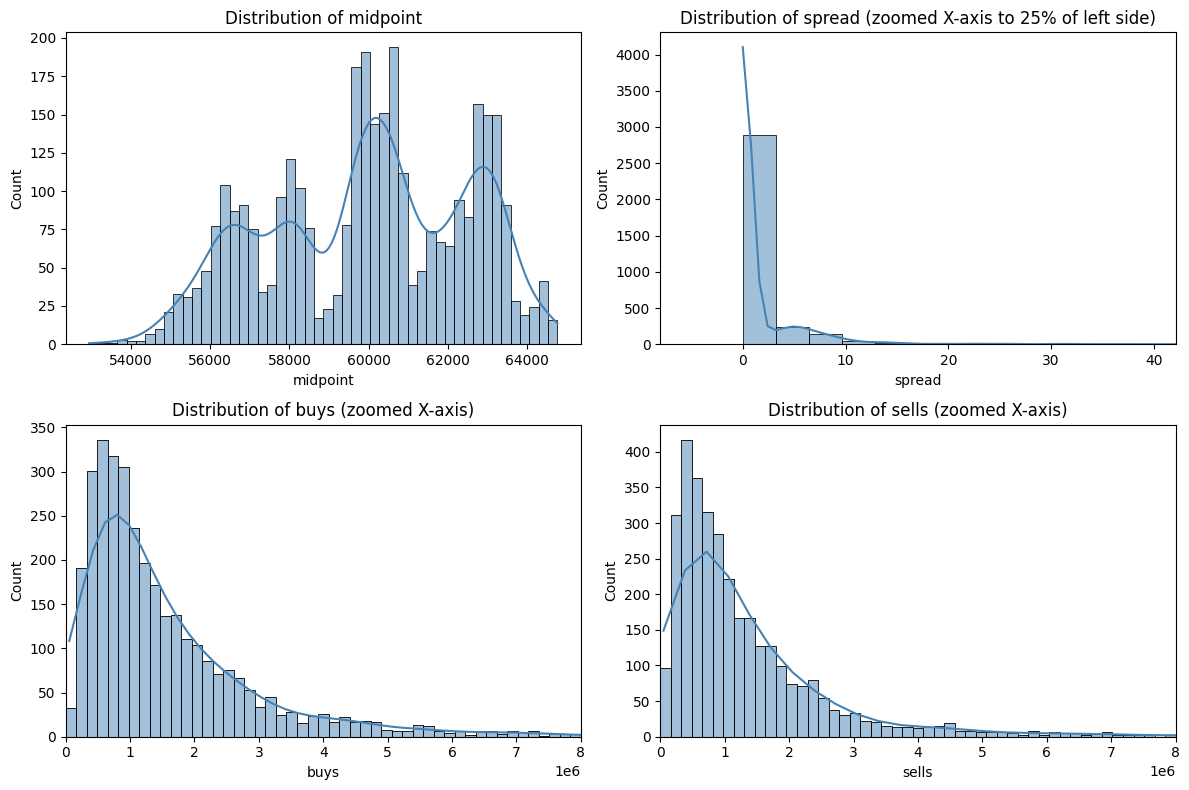

In [185]:
features_to_plot = ['midpoint', 'spread', 'buys', 'sells']

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i, f in enumerate(features_to_plot):
    if i==1:
        sns.histplot(df[f], bins=50, ax=axs[i], kde=True, color='steelblue')
        axs[i].set_xlim(right=axs[i].get_xlim()[1]*0.25)
        axs[i].set_title(f'Distribution of {f} (zoomed X-axis to 25% of left side)')
    elif i==2 or i==3:
        axs[i].set_xlim(right=8*1e6)
        axs[i].set_title(f'Distribution of {f} (zoomed X-axis)')
        bins = np.linspace(0, axs[i].get_xlim()[1], 50)
        sns.histplot(df[f], bins=bins, ax=axs[i], kde=True, color='steelblue')
    elif i==0:
        sns.histplot(df[f], bins=50, ax=axs[i], kde=True, color='steelblue')
        axs[i].set_title(f'Distribution of {f}')
plt.tight_layout()
plt.show()

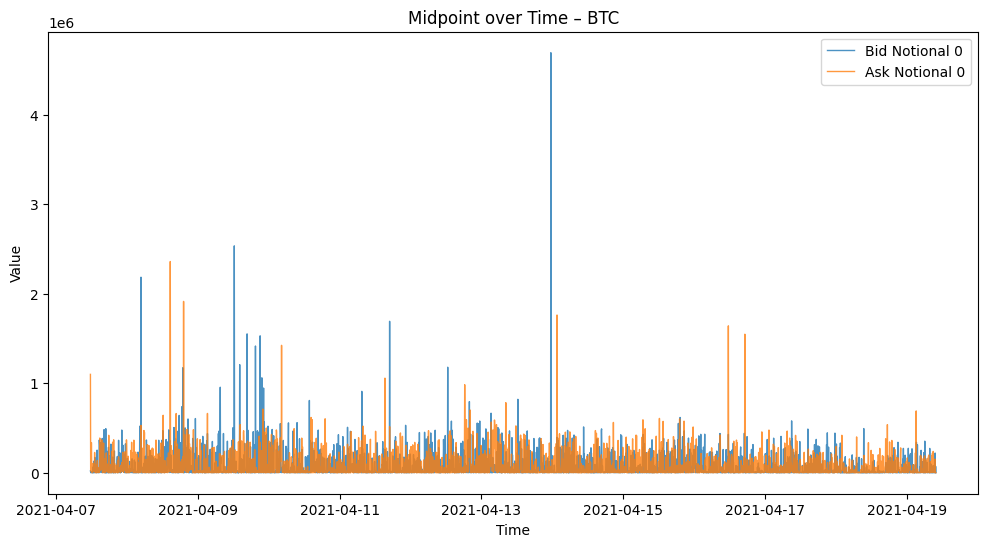

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['bids_notional_0'], label='Bid Notional 0', linewidth=1, alpha=0.8)
plt.plot(df.index, df['asks_notional_0'], label='Ask Notional 0', linewidth=1, alpha=0.8)
plt.legend()
plt.title('Midpoint over Time – BTC')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

There are some observations of with extreme large values of Bid/Ask notional volumes.

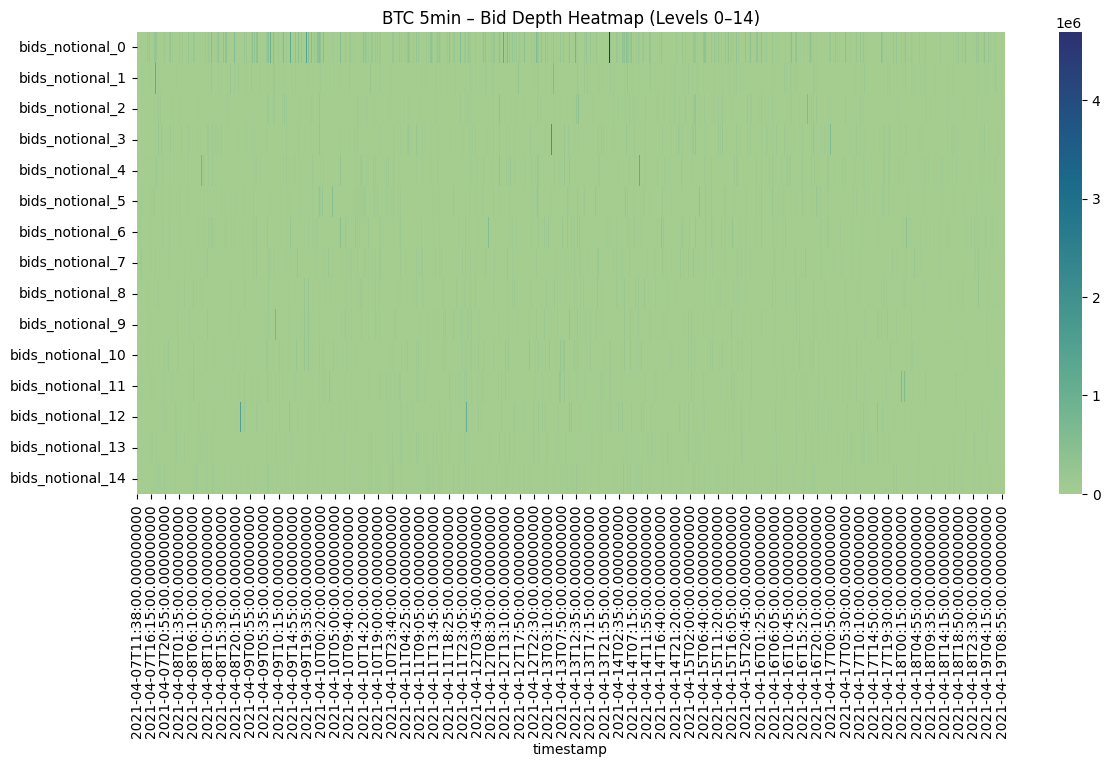

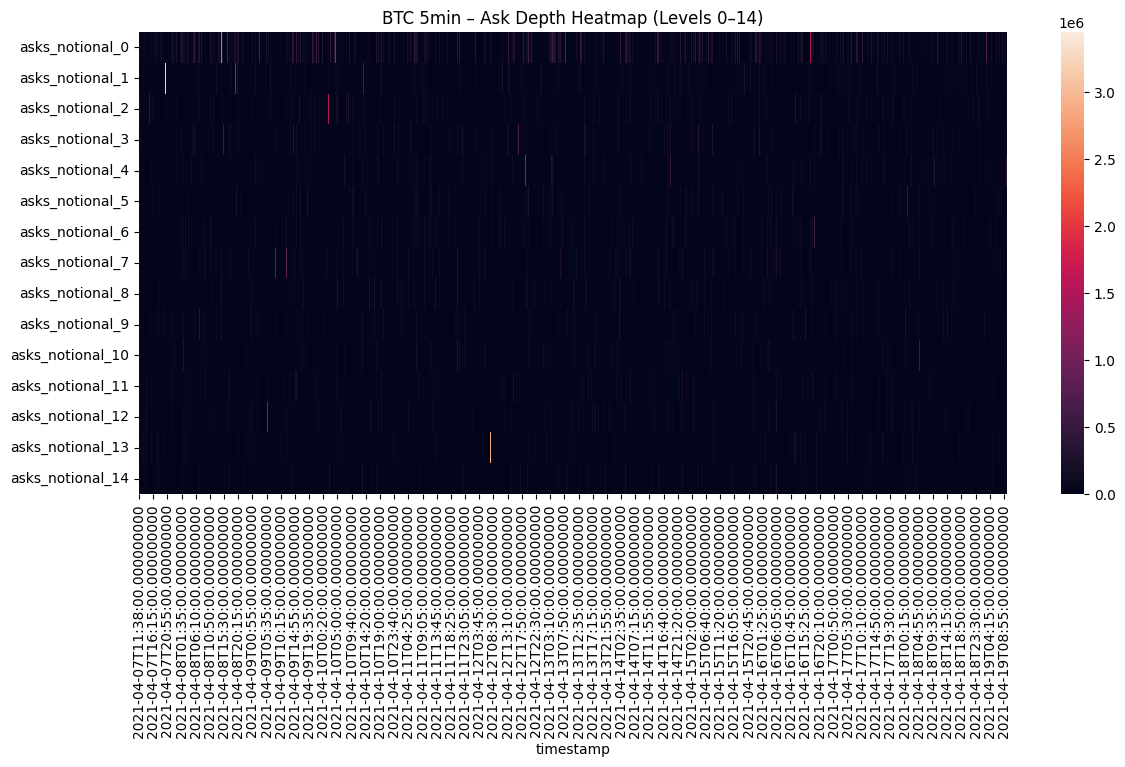

In [153]:
bid_levels = [f'bids_notional_{i}' for i in range(15)]
ask_levels = [f'asks_notional_{i}' for i in range(15)]

# Combine to 2D matrix
depth_data = pd.DataFrame({
    'timestamp': df.index,
    **{lvl: df[lvl] for lvl in bid_levels + ask_levels}
})

plt.figure(figsize=(14, 6))
sns.heatmap(depth_data[bid_levels].T, cmap='crest', cbar=True)
plt.title(f'{asset} {freq} – Bid Depth Heatmap (Levels 0–14)')
plt.show()

plt.figure(figsize=(14, 6))
sns.heatmap(depth_data[ask_levels].T, cmap='rocket', cbar=True)
plt.title(f'{asset} {freq} – Ask Depth Heatmap (Levels 0–14)')
plt.show()


There are just a few eye-catching spots on each heatmap. The log1p scaled potentionally show more information.

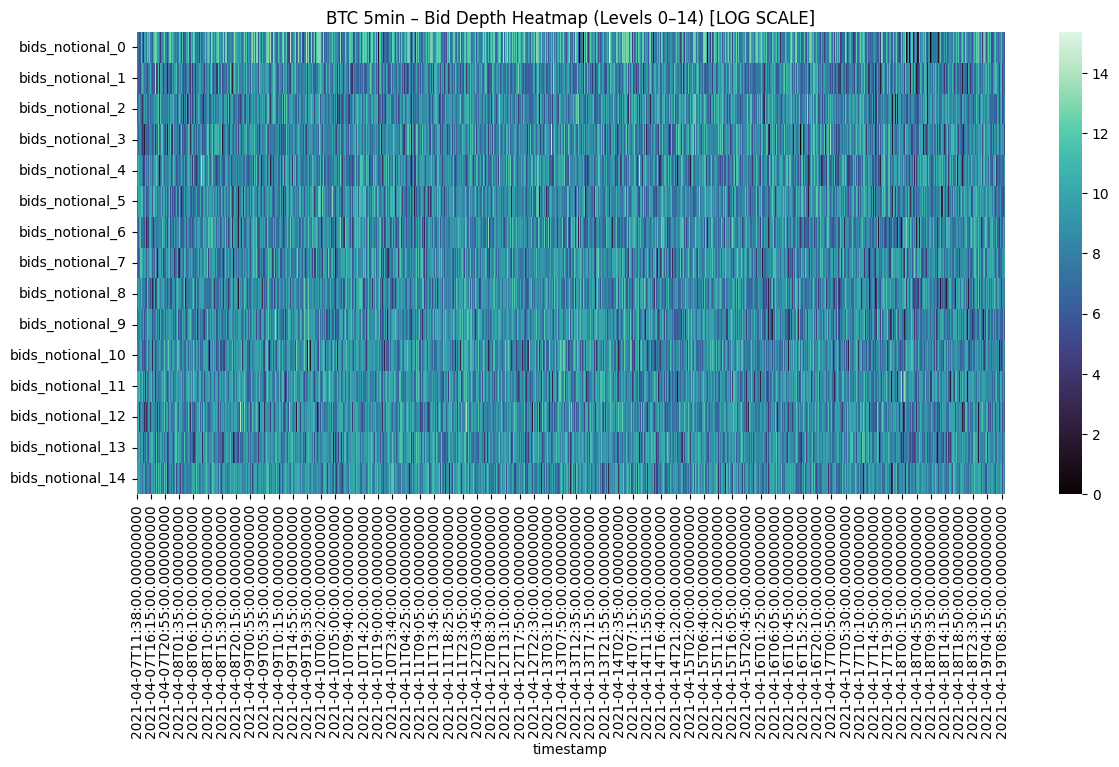

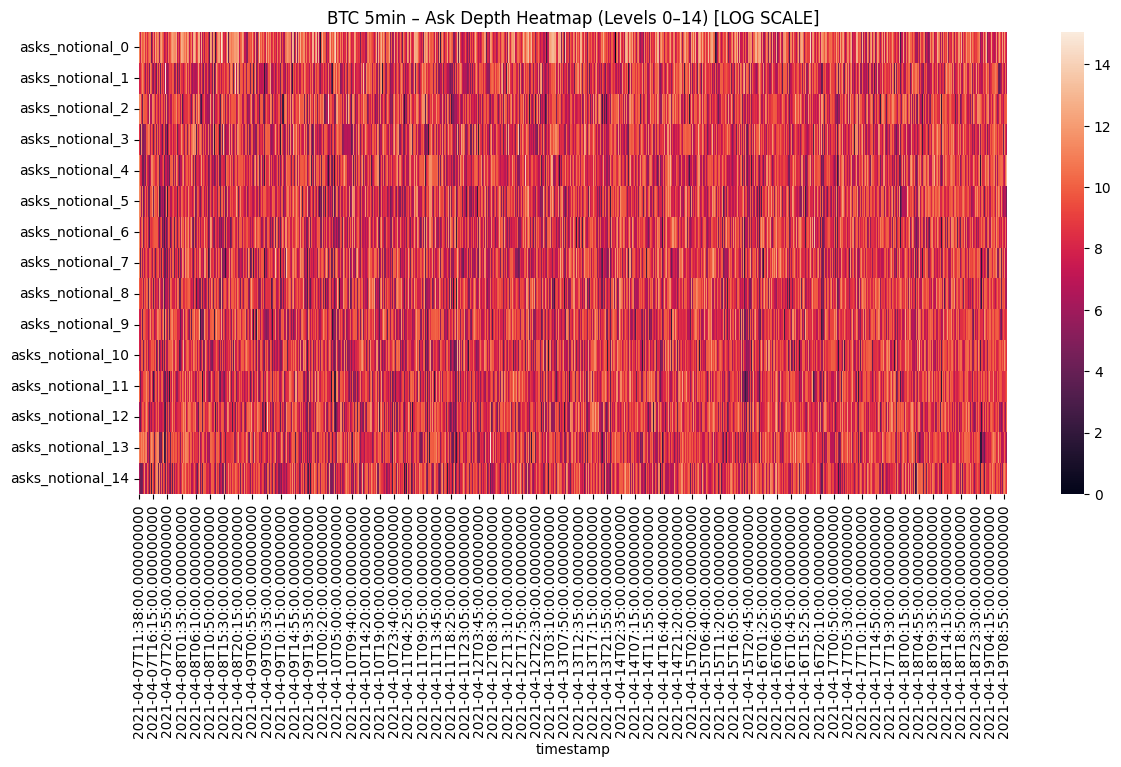

In [152]:
bid_levels = [f'bids_notional_{i}' for i in range(15)]
ask_levels = [f'asks_notional_{i}' for i in range(15)]

# Combine to 2D matrix
depth_data = pd.DataFrame({
    'timestamp': df.index,
    **{lvl: df[lvl] for lvl in bid_levels + ask_levels}
})

bid_data_log = np.log1p(depth_data[bid_levels].T)

plt.figure(figsize=(14, 6))
sns.heatmap(
    bid_data_log,
    cmap='mako', 
    cbar=True
)
plt.title(f'{asset} {freq} – Bid Depth Heatmap (Levels 0–14) [LOG SCALE]')
plt.show()

ask_data_log = np.log1p(depth_data[ask_levels].T)

plt.figure(figsize=(14, 6))
sns.heatmap(
    ask_data_log,
    cmap='rocket', 
    cbar=True
)
plt.title(f'{asset} {freq} – Ask Depth Heatmap (Levels 0–14) [LOG SCALE]')
plt.show()


At both heatmap the forst level is brighter than others (most orders executed close to the mid price). Also it is easier to understand low-volume areas (dark regions) with log scaled Notional volume. This information can be important for model. 

### Notional Volume

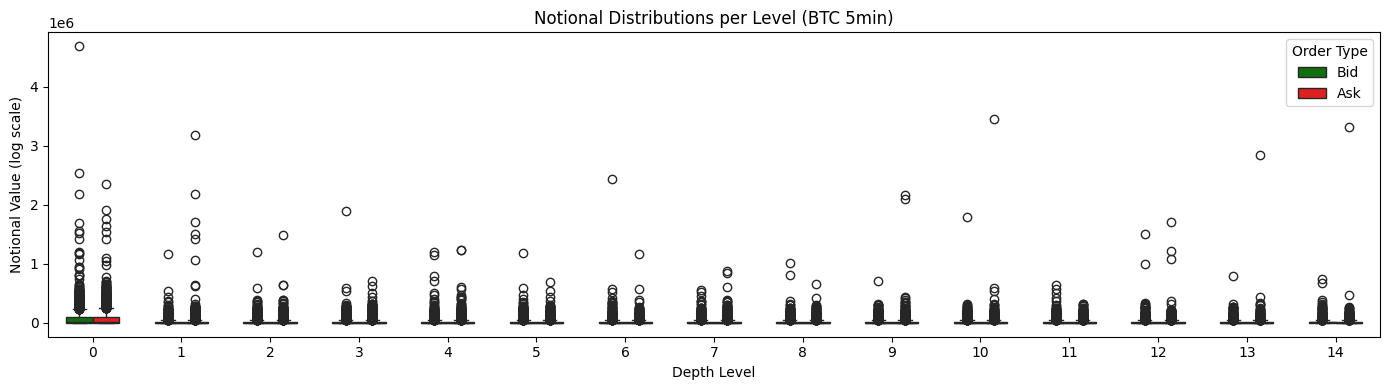

In [156]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(df) * 2,
        'Type': ['Bid'] * len(df) + ['Ask'] * len(df),
        'Value': pd.concat([df[f'bids_notional_{i}'], df[f'asks_notional_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)
#plt.yscale('log') 
plt.title('Notional Distributions per Level ({} {})'.format(asset, freq))
plt.xlabel('Depth Level')
plt.ylabel('Notional Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

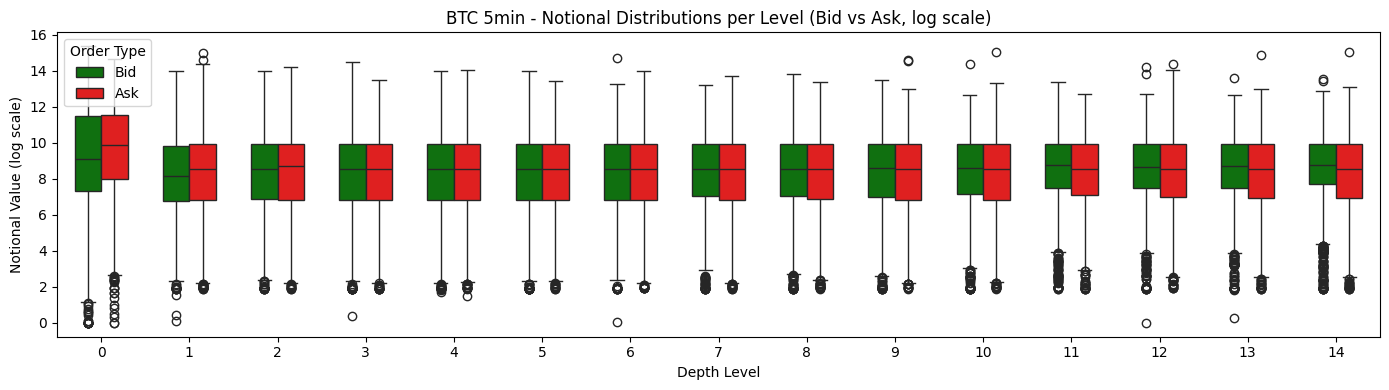

In [158]:
df_box_all['Value'] = np.log1p(df_box_all['Value'])

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

plt.title(f'{asset} {freq} - Notional Distributions per Level (Bid vs Ask, log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Notional Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

The most pairs of Bid/Ask are close to earch other in terms of distribution of Notional volume, except the first level, where the volume is above other levels.

### Distance from midpoint

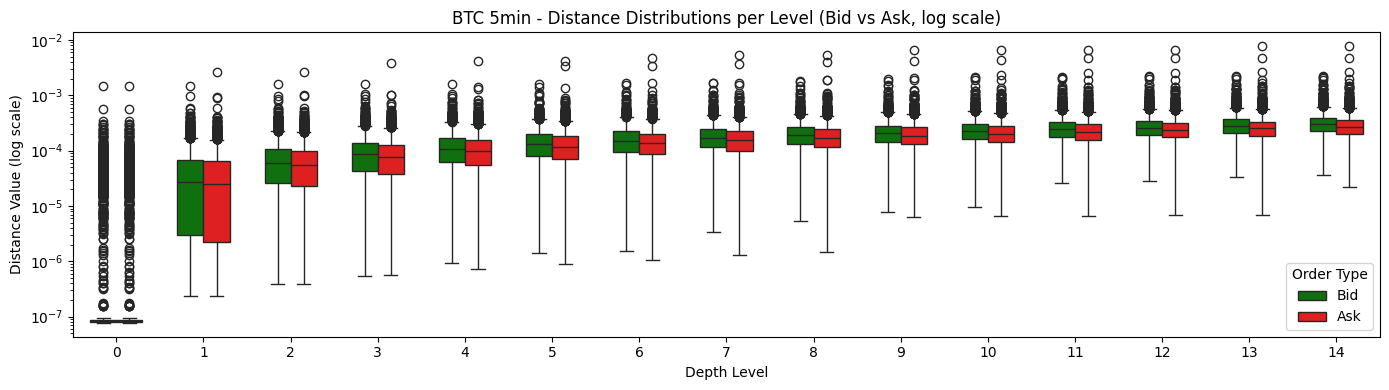

In [160]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(df) * 2,
        'Type': ['Bid'] * len(df) + ['Ask'] * len(df),
        'Value': pd.concat([df[f'bids_distance_{i}']*(-1), df[f'asks_distance_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

plt.yscale('log') 
plt.title(f'{asset} {freq} - Distance Distributions per Level (Bid vs Ask, log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Distance Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

Usually the distance at the 0 level is very close to 0. At levels 1-14 the distance increases gradually.

### Calcel Volume

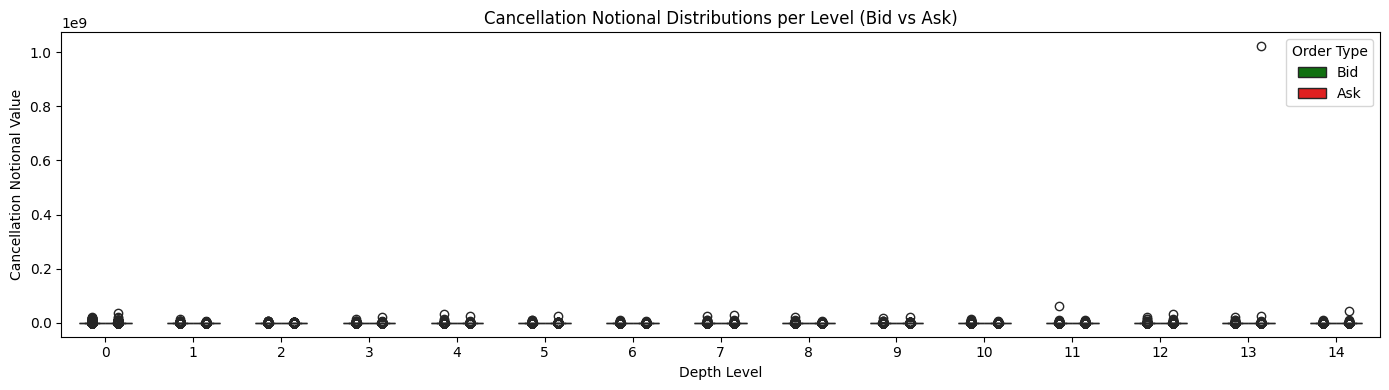

In [161]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(df) * 2,
        'Type': ['Bid'] * len(df) + ['Ask'] * len(df),
        'Value': pd.concat([df[f'bids_cancel_notional_{i}'], df[f'asks_cancel_notional_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

#plt.yscale('log') 
plt.title('Cancellation Notional Distributions per Level (Bid vs Ask)')
plt.xlabel('Depth Level')
plt.ylabel('Cancellation Notional Value')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

In [162]:
df_box_all[df_box_all['Value'] >= max(df_box_all['Value']*0.30)]

,Level,Type,Value
92406,13,Ask,1.021637e+09


An insane amount of 1 billion in dollars equivalent was canceled on the 13th level. This is the outlier.

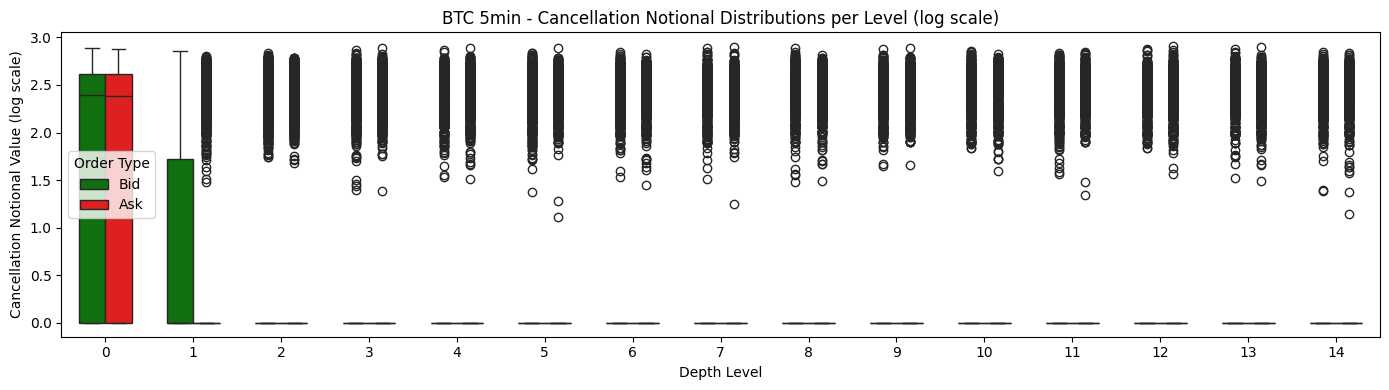

In [167]:
df_box_all= df_box_all[df_box_all['Value'] < max(df_box_all['Value'])] # remove outlier
df_box_all['Value'] = np.log1p(df_box_all['Value']) # log scale

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

#plt.yscale('log') 
plt.title(f'{asset} {freq} - Cancellation Notional Distributions per Level (log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Cancellation Notional Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

As already discovered, there are a lot of zeros at the cancelation volumes, but for low levels the distribution exists.

### Limit Volume

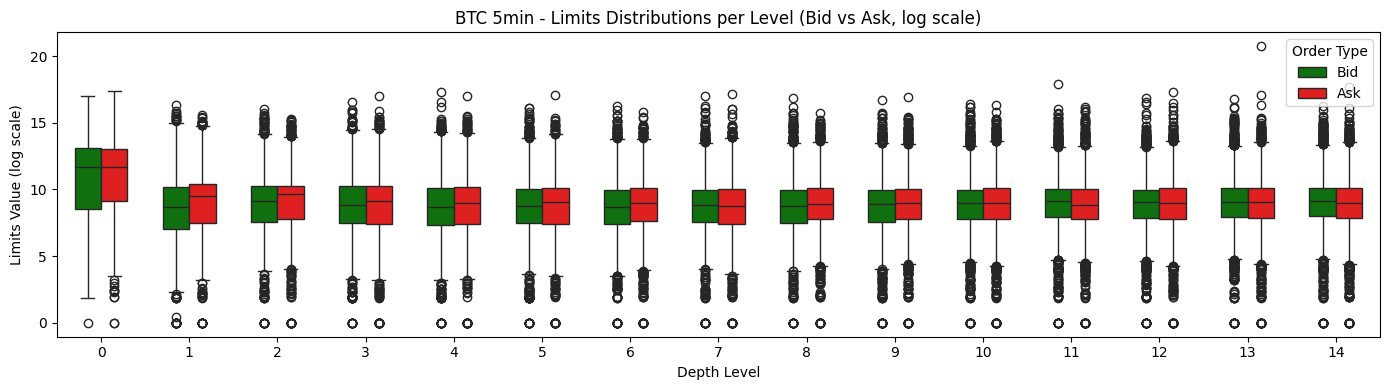

In [172]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(df) * 2,
        'Type': ['Bid'] * len(df) + ['Ask'] * len(df),
        'Value': pd.concat([df[f'bids_limit_notional_{i}'], df[f'asks_limit_notional_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)
df_box_all['Value'] = np.log1p(df_box_all['Value']) # log scale

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)
#plt.yscale('log') 
plt.title(f'{asset} {freq} - Limits Distributions per Level (Bid vs Ask, log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Limits Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

Limit volume is higher for 0 level and stable on other levels.

### Market Volume

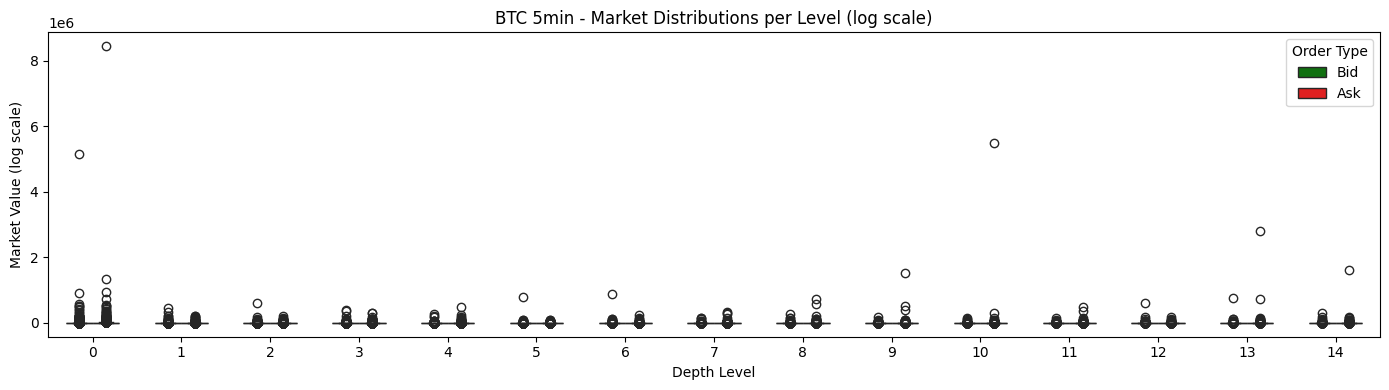

In [174]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(df) * 2,
        'Type': ['Bid'] * len(df) + ['Ask'] * len(df),
        'Value': pd.concat([df[f'bids_market_notional_{i}'], df[f'asks_market_notional_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

#plt.yscale('log') 
plt.title(f'{asset} {freq} - Market Distributions per Level (log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Market Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

In [175]:
df_box_all[df_box_all['Value'] >= max(df_box_all['Value']*0.30)]

,Level,Type,Value
1192,0,Bid,5142645.00
4129,0,Ask,8437112.00
72380,10,Ask,5484520.50
92273,13,Ask,2789501.25


There are some outliers standing out from the general scope.

In [176]:
df_box_all= df_box_all[df_box_all['Value'] < max(df_box_all['Value']*0.30)]


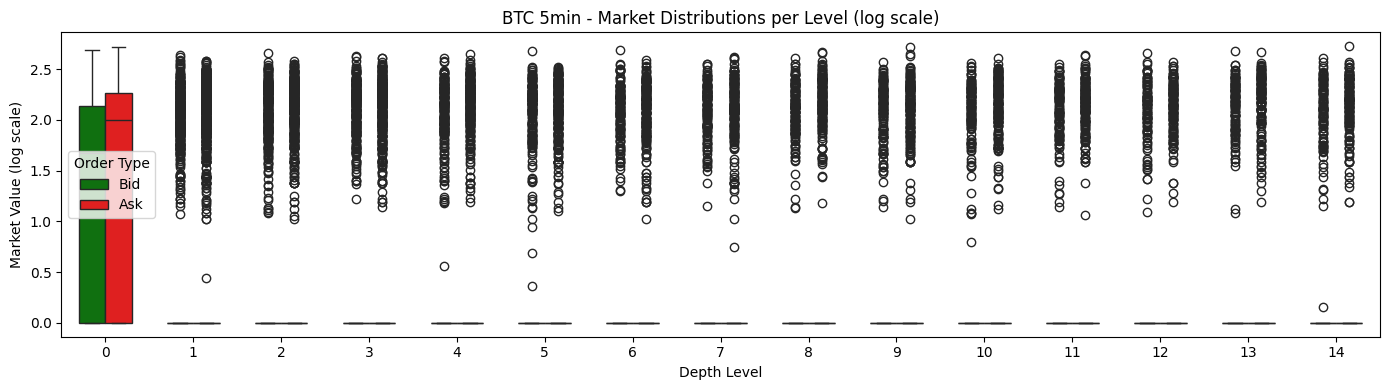

In [178]:
df_box_all['Value'] = np.log1p(df_box_all['Value'])

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

#plt.yscale('log') 
plt.title(f'{asset} {freq} - Market Distributions per Level (log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Market Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

Similary to the Cancel volume, the Market volume shows mainly zero values on the levels 1-14. 

### Correlation matrix

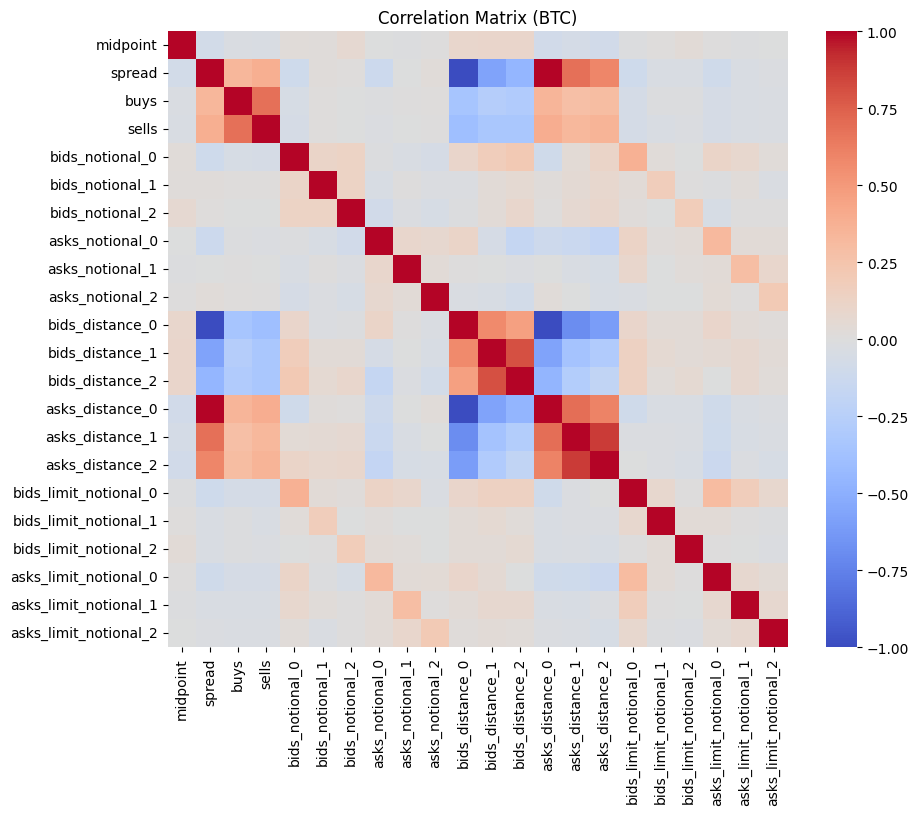

In [ ]:
corr_features = ['midpoint', 'spread', 'buys', 'sells'] + \
                 [f'bids_notional_{i}' for i in range(3)] + \
                 [f'asks_notional_{i}' for i in range(3)] + \
                 [f'bids_distance_{i}' for i in range(3)] + \
                 [f'asks_distance_{i}' for i in range(3)] + \
                 [f'bids_limit_notional_{i}' for i in range(3)] + \
                 [f'asks_limit_notional_{i}' for i in range(3)]

corr = df[corr_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix ({} {})'.format(asset, freq))
plt.show()

There is a weak positive correlation between spread&sells and buys&sells, which usually make sence it any market. 

Also, there is a strong negative correlation between **spread** & **bids_distance_0** and strong positive correlation between **spread** & **asks_distance_0**. (the correlations decreases in absolute values for deeper levels)

There is strong negative correlation between **bids_distance_0** & **asks_distance_0**, whcih is also logically correct, because these features depends on the market activity at the considered time interval.